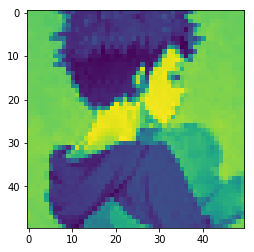

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir(r"C:\Users\Prasad\Downloads\9Gag")

files = os.listdir()
selected_file = files[0]

img = cv2.imread(selected_file)

new_img = cv2.resize(img, (50,50))
gray_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)
height, width = gray_img.shape
plt.imshow(gray_img)

In [2]:
def conv(img, fi, multi_fi = False):
    if not multi_fi:
        conv_img = np.zeros(shape = (img.shape[0] - 2, img.shape[1] - 2))
        for row in range(0, img.shape[0] - 2):
            for col in range(0, img.shape[1] - 2):
                Slice = img[row:row+3, col:col + 3]
                conv = np.sum(Slice * fi)
                conv_img[row, col] = conv

        return conv_img
    
    elif multi_fi:
        conv_img = np.zeros(shape = (img.shape[0] - 2, img.shape[1] - 2, len(fi)))
        
        for channel, F in enumerate(fi):
            for row in range(0, img.shape[0] - 2):
                for col in range(0, img.shape[1] - 2):
                    Slice = img[row:row+3, col:col + 3, channel]
                    conv = np.sum(Slice * F)
                    conv_img[row, col, channel] = conv
        return conv_img
    
horizontal_filter = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

vertical_filter = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

edge_filter = np.array([
    [1,1,1],
    [1,0,1],
    [1,1,1]
])

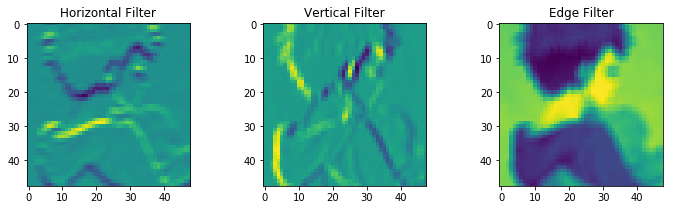

In [3]:
f, ax = plt.subplots(1,3, figsize = [12,3])

ax[0].set_title('Horizontal Filter')
ax[0].imshow(conv(gray_img, horizontal_filter))


ax[1].set_title('Vertical Filter')
ax[1].imshow(conv(gray_img, vertical_filter))


ax[2].set_title('Edge Filter')
ax[2].imshow(conv(gray_img, edge_filter))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


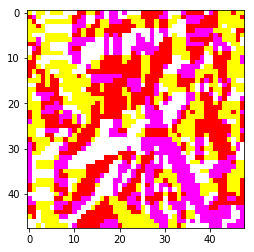

In [4]:
img = cv2.imread(selected_file)
new_img = cv2.resize(img, (50,50))

filters = [edge_filter, vertical_filter, horizontal_filter]
plt.imshow(conv(new_img, filters, True))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


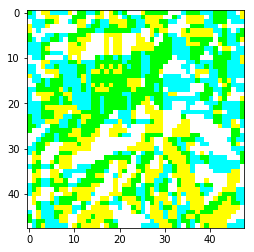

In [5]:
filters = [horizontal_filter, edge_filter, vertical_filter]
plt.imshow(conv(new_img, filters, True))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


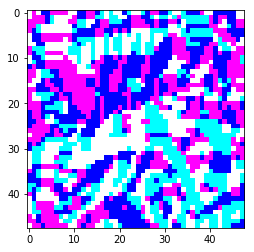

In [6]:
filters = [vertical_filter, horizontal_filter, edge_filter]
plt.imshow(conv(new_img, filters, True))